<h3 style="text-align: center;">Monte Carlo (MC) Simulations for power functions</h3>
<h4 style="text-align: center;">Maria Santos</h4>

Let $\chi^2_k(\lambda)$  denote the non-central $\chi^2_k$ distribution with the non-centrality parameter $\lambda>0$. Recall that if
$$X \sim \chi^{2}_k(\lambda),$$

then can be represented as
$$X\overset{d}{=}(Z_1+\lambda)^2+\sum_{j=2}^k Z_j^2,$$
where $Z_1,\dots, Z_k$ are iid $N(0,1)$.

We have shown that the asymptotic power of the dize $\alpha$ Wald test for $H_0: \beta = \beta_0$ against $H_1:\beta \neq \beta_0$ under local alternative $\beta = \beta_0+\frac{\delta}{\sqrt(n)}$ is given by

$$\pi(\lambda,k)=Pr(\chi^2_k(\lambda)>\chi^2_{k,1-\alpha}),$$

where $\lambda = (\delta'V^{-1}\delta)^{1/2}, V$ is the asymptotic variance-covariance matrix of the estimator of $\beta$, and $\chi^2_k(\lambda)>\chi^2_{k,1-\alpha}$ denotes the $1-\alpha$ quantile of the central $\chi^2_k(\lambda)$, i.e., $\chi^2_k(0)$.

In this question, you will use Monte Carlo (MC) simulations to simulate the power function $\pi(\lambda,k)$, and compute the asymptotic power of the Wald test for different values of $\lambda$ and $k$.

Assume that $\alpha=0.05$.

In [1]:
# packages
using Distributions
using LinearAlgebra
using PrettyTables
using LaTeXStrings # for LaTeX strings
using Parameters
using Statistics
using Random
using Plots

**Part A.**

Simulate $\pi(\lambda,k)$ for the numbers of degrees of freedom $k=1,5,10$ and the noncentrality parameter $\lambda$ taking values in the grid 0.0:0.1:6.0 (the values from zero to six with a step of 0.1).

* Use $R=10^5$ MC repetitions.
* To simulate $\pi(\lambda,k)$, generate $X_1, \dots, X_R \sim \chi^2_k(\lambda)$, and compute $R_{-1} \sum_{r=1}^R 1(x_r>\chi^2_{k,0.95})$, i.e. the fraction of the MC iterations where the draws $\chi^2_k(\lambda)$ exceeded the critical value.

* To generate $\chi^2_k(\lambda)$ draws, use the representation of the $\chi^2_k(\lambda)$ distribution in terms of the sum of squared independent standard normals.

* To compute the critical values $\chi^2_{k,0.95}$, use the package <code>Distributions</code> and the command <code>quantile(Chisq(k),0.95)</code> .

In [2]:
function generate_noncentral_chi_squared(R::Int, k::Int, λ::Float64, seed::Int)
    Random.seed!(seed)
    chisq_vals = Float64[]
    
    for i in 1:R
        z = randn(k)
        #x = sum((z .+ sqrt(lambda)).^2)
        if k == 1
            x = (z[1]+λ)^2
        else
            x = (z[1]+λ)^2 + sum(z[2:end].^2)
        end
        push!(chisq_vals, x)
    end
    
    return chisq_vals
end;


In [3]:
function compare_to_critical(R::Int, k::Int, λ::Float64, α::Float64, seed::Int)
    chisq_vals = generate_noncentral_chi_squared(R, k, λ, seed)
    critical_value = quantile(Chisq(k), 1 - α)
    
    prob = count(x -> x > critical_value, chisq_vals)
    ratio = prob / R
    
    return ratio
end;


In [4]:
α=0.05
R=10^5
seed=1995;

In [5]:
k_values = [1, 5, 10]
lambda_values = 0:0.1:6

results_k1 = []
results_k5 = []
results_k10 = []

for k in k_values
    results = []
    for λ in lambda_values
        ratio = compare_to_critical(R, k, λ, α, seed)
        push!(results, ratio)
    end
    
    if k == 1
        results_k1 = results
    elseif k == 5
        results_k5 = results
    elseif k == 10
        results_k10 = results
    end
end;


**Part B.**

What are the simulated probabilities of rejection when $\lambda=0$? Are the they close to what one would expect?

In [8]:
values = ["Power function" results_k1[1] results_k5[1] results_k10[1]]

table = pretty_table(values;header=["Degrees of Freedom", "1", "5", "10"])


┌────────────────────┬─────────┬─────────┬─────────┐
│ Degrees of Freedom │       1 │       5 │      10 │
├────────────────────┼─────────┼─────────┼─────────┤
│     Power function │ 0.05052 │ 0.05136 │ 0.05013 │
└────────────────────┴─────────┴─────────┴─────────┘


The power function can be defined by $\pi(\lambda,k)=1-Pr(\text{Type II error})$. As we saw in class, the $Pr(\text{Type II error})$ goes to 0 when the non-centrality parameter is high, and goes to $1-\alpha$ when the non-centrality parameter is low. Then, for $\lambda=0$, the $Pr(\text{Type II error})$ aprroximates from 0, and the power of the test goes to $1 - (1-\alpha)=\alpha$, which is what we got above.

**Part C.**

Plot the three power functions $\pi(\cdot,k)$ for $k=1,5,10$ with the values of $λ$ on the horizontal axis and the rejection probabilites on the vertical axis.

* Use the package Plots and the command <code>plot()</code>.
* To add an extra curve to a previously created figure, use <code>plot!()</code>.
* You can use the package LaTeXStrings to use LaTeX in labels. For example, to add LaTeX labels to the axis, you can use <code>plot!(xlabel=L"\lambda",ylabel=L"\pi(\lambda,k)")</code>.

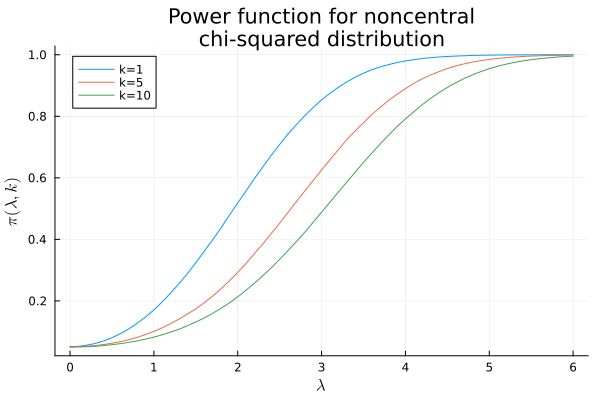

In [7]:
plot(lambda_values, results_k1, label="k=1", xlabel=L"\lambda", ylabel=L"\pi(\lambda,k)")
plot!(lambda_values, results_k5, label="k=5")
plot!(lambda_values, results_k10, label="k=10")
plot!(title="Power function for noncentral\nchi-squared distribution", legend=:topleft)

**Part D.**

Use the figure created in Part C to compare the asymptotic power of the tests with the same noncentrality parameter but different degrees of freedom.

Answer: As defined above (and as we saw in class), the power of the test is defined from a statistic that has a "noise" term (see <code>generate_noncentral_chi_squared</code> function). Then, given the non-centrality parameter $\lambda$, the power goes down if we increase degrees of freedom.